In [1]:
import sys
sys.path.append('../../src')
from modules import *
from columns import *

In [2]:
data=pd.read_csv('../../data/PAH_PCB_OCP.csv',index_col=0)
report=pd.read_csv('../../data/VEGA_report.csv',index_col=0)

In [3]:
novi_nazivi = ["alfa-HCH",
              "beta-HCH",
              "gama-HCH"]
report.loc[12, 'tId'] = novi_nazivi[0] 
report.loc[13, 'tId'] = novi_nazivi[1]
report.loc[14, 'tId'] = novi_nazivi[2]

In [4]:
new_smiles = ["Cl[C@H]1[C@@H](Cl)[C@H](Cl)[C@H](Cl)[C@@H](Cl)[C@@H]1Cl",
              "Cl[C@H]1[C@H](Cl)[C@@H](Cl)[C@H](Cl)[C@@H](Cl)[C@@H]1Cl",
              "Cl[C@H]1[C@H](Cl)[C@@H](Cl)[C@@H](Cl)[C@H](Cl)[C@H]1Cl"]
report.loc[12, 'SMILES'] = new_smiles[0] 
report.loc[13, 'SMILES'] = new_smiles[1]
report.loc[14, 'SMILES'] = new_smiles[2]

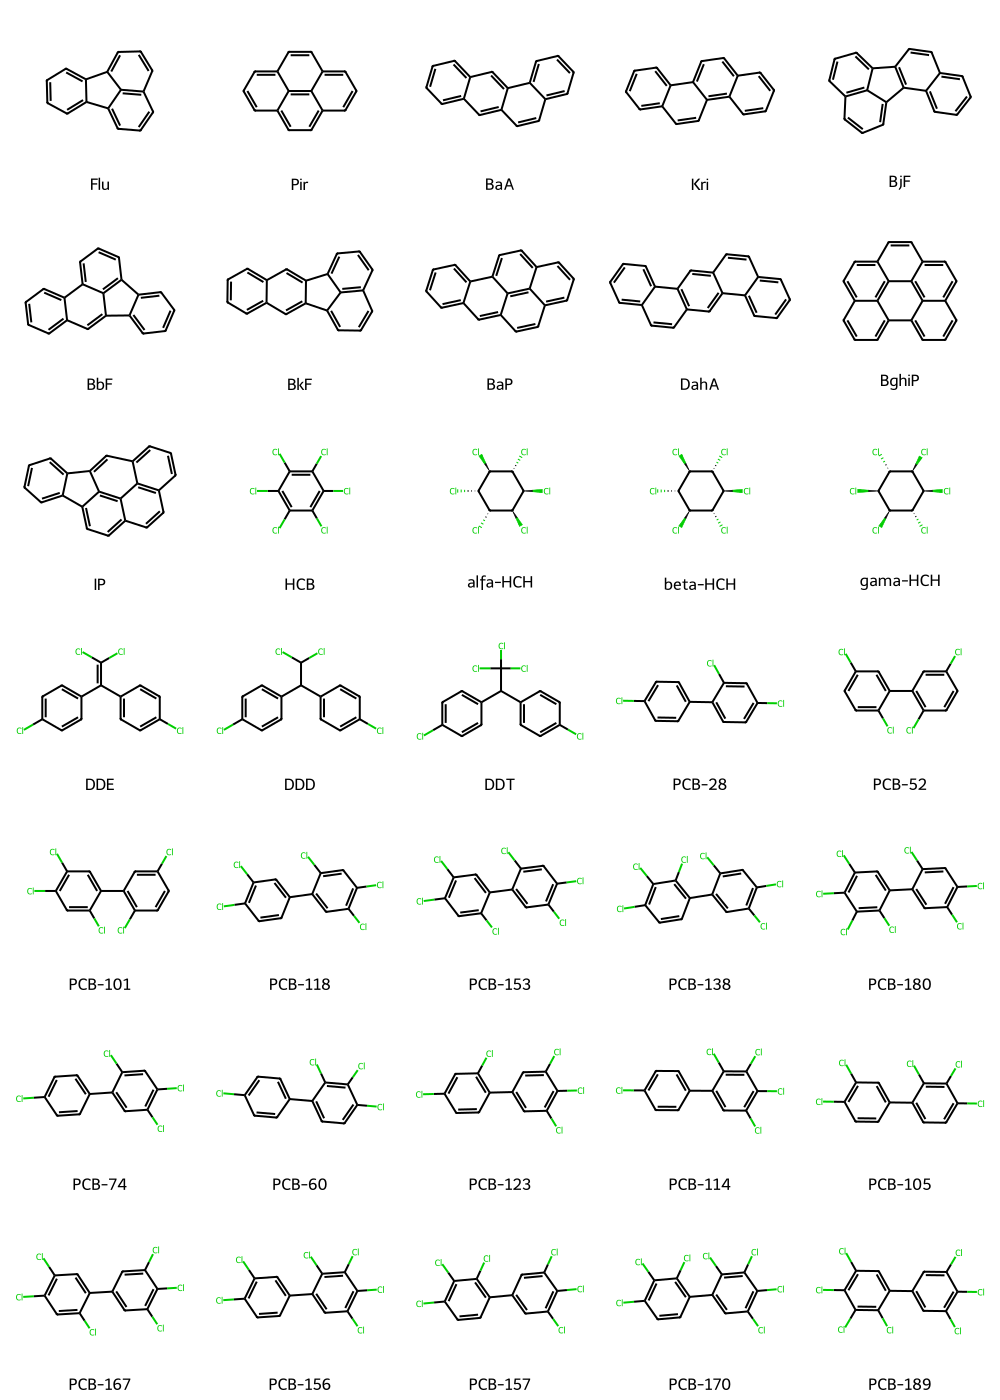

In [5]:
smiles_list=report['SMILES']
molecule_names=report['tId'].to_list()

molecules=[Chem.MolFromSmiles(smiles) for smiles in smiles_list]

img=Draw.MolsToGridImage(molecules, molsPerRow=5, legends=molecule_names)
img


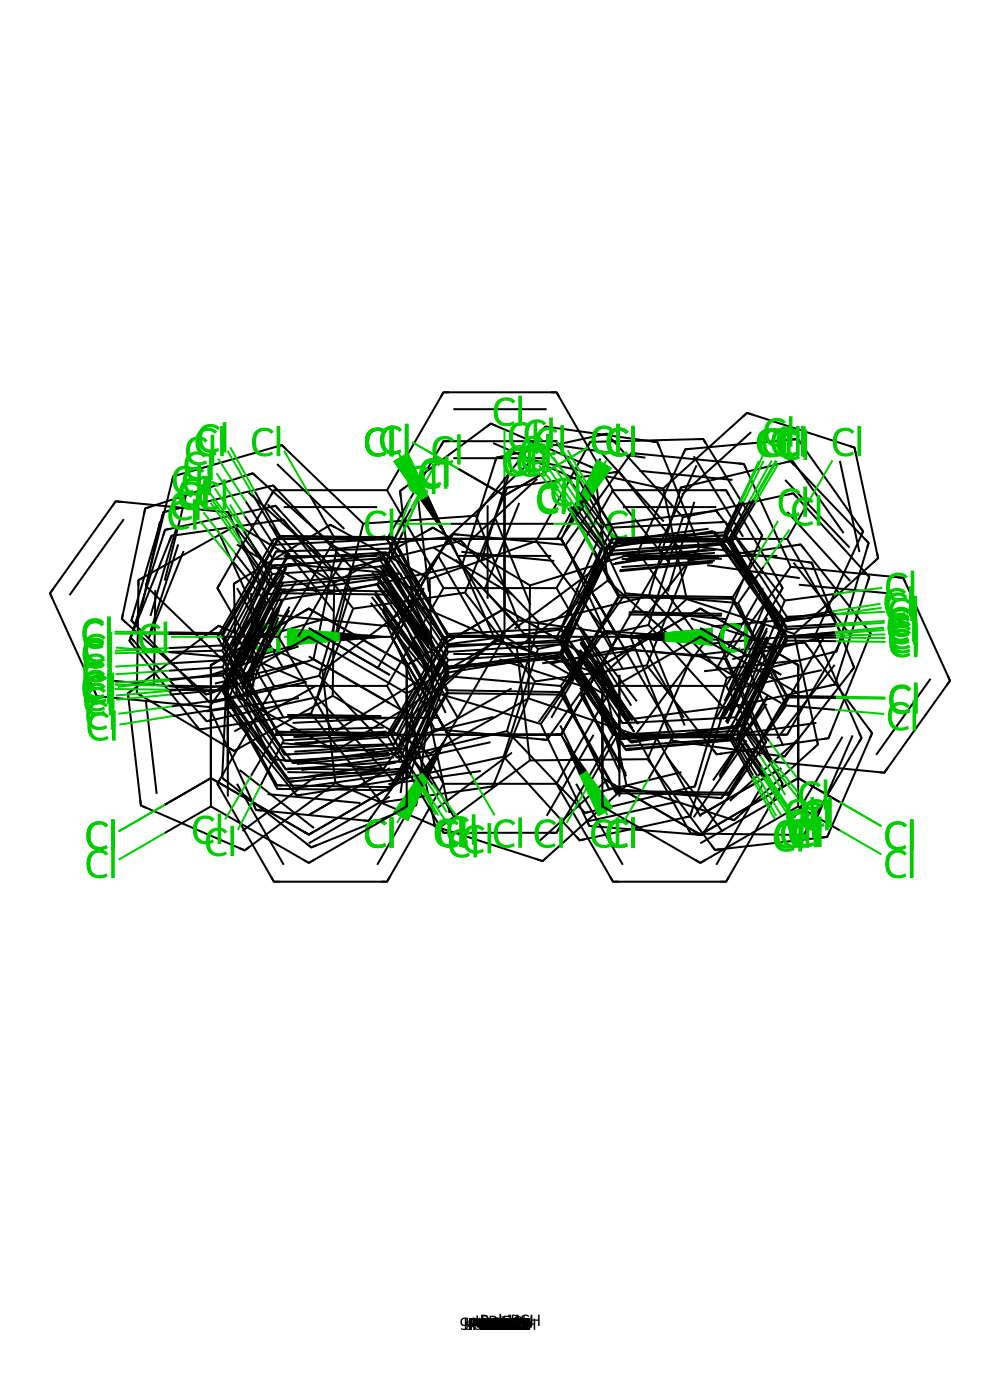

In [6]:
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import rdMolDraw2D
from IPython.display import SVG, display
import io

# Pretpostavimo da su smiles_list i molecule_names već definirani
molecules = [Chem.MolFromSmiles(smiles) for smiles in smiles_list]

# Inicijalizacija SVG canvasa
drawer = rdMolDraw2D.MolDraw2DSVG(200*5, 200*len(molecules)//5)
drawer.DrawMolecules(molecules, legends=molecule_names)

drawer.FinishDrawing()
svg = drawer.GetDrawingText()

# Spremanje SVG-a u datoteku
with open("molecules_grid.svg", "w") as svg_file:
    svg_file.write(svg)

# Prikaz SVG-a u Jupyter bilježnici
display(SVG(svg))


In [10]:
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import rdMolDraw2D
import os

# Pretpostavimo da su smiles_list i molecule_names već definirani
molecules = [Chem.MolFromSmiles(smiles) for smiles in smiles_list]

# Specificiranje putanje gdje želite spremiti SVG datoteke
save_path = "../../data/VEGA_QSAR_modeli/molecules_svgs"

# Kreiranje direktorija za spremanje SVG datoteka ako ne postoji
os.makedirs(save_path, exist_ok=True)

for i, mol in enumerate(molecules):
    # Inicijalizacija SVG canvasa za svaku molekulu
    drawer = rdMolDraw2D.MolDraw2DSVG(200, 200)  # Ovdje možete prilagoditi veličinu prema potrebi
    drawer.DrawMolecule(mol, legend=molecule_names[i])
    drawer.FinishDrawing()
    svg = drawer.GetDrawingText().replace('svg:','')

    # Spremanje SVG-a u zasebnu datoteku
    filename = os.path.join(save_path, f"{molecule_names[i].replace('/', '_')}.svg")  # Zamjena / u imenima da se izbjegnu problemi s putanjom
    with open(filename, "w") as svg_file:
        svg_file.write(svg)


In [7]:
from IPython.display import HTML, display

# Inicijalizacija HTML stringa za grid
html = '<div style="display: flex; flex-wrap: wrap; align-items: flex-start;">'

for mol, name in zip(molecules, molecule_names):
    drawer = rdMolDraw2D.MolDraw2DSVG(200, 200)
    drawer.DrawMolecule(mol)
    drawer.FinishDrawing()
    svg = drawer.GetDrawingText().replace('svg:', '')
    html += f'<div style="width: 200px; margin: 10px;">{svg}<div style="text-align: center;">{name}</div></div>'

html += '</div>'

# Prikazivanje HTML-a u Jupyter bilježnici
display(HTML(html))


In [8]:
html_content = html  # Pretpostavimo da je ovo vaš HTML string iz prethodnog primjera

# Odredite putanju i ime datoteke u koju želite spremiti HTML sadržaj
filename = '../../data/VEGA_QSAR_modeli/histogram_novo.html'

# Spremanje HTML sadržaja u datoteku
with open(filename, 'w') as file:
    file.write(html_content)

print(f'HTML sadržaj je spremljen u datoteku: {filename}')


HTML sadržaj je spremljen u datoteku: ../../data/VEGA_QSAR_modeli/histogram_novo.html


In [9]:
from rdkit.Chem.Draw import rdMolDraw2D
from IPython.display import SVG
import xml.etree.ElementTree as ET

# Inicijalizirajte SVG root element
svg_root = ET.Element('svg', xmlns="http://www.w3.org/2000/svg", version="1.1", width="1000", height="1000")

for i, (mol, name) in enumerate(zip(molecules, molecule_names)):
    # Generirajte SVG za svaku molekulu
    drawer = rdMolDraw2D.MolDraw2DSVG(200, 200)
    drawer.DrawMolecule(mol)
    drawer.FinishDrawing()
    svg = drawer.GetDrawingText()
    
    # Uklonite XML zaglavlje iz SVG-a
    svg = svg.split('\n', 1)[1] if svg.startswith('<?xml') else svg
    
    # Učitajte SVG kao XML element
    mol_svg = ET.fromstring(svg)
    
    # Prilagodite poziciju molekule koristeći 'transform' atribut
    row = i // 5
    col = i % 5
    x_offset = col * 220  # 200px za svaku molekulu + 20px margina
    y_offset = row * 220  # Isto za vertikalni položaj
    mol_svg.set('transform', f'translate({x_offset},{y_offset})')
    
    # Dodajte SVG molekule u root SVG
    svg_root.append(mol_svg)

# Konvertujte natrag u string
ET.register_namespace("", "http://www.w3.org/2000/svg")  # Registrirajte zadani namespace
final_svg = ET.tostring(svg_root, encoding='unicode')

# Spremite finalni SVG
with open("molecules_grid.svg", "w") as f:
    f.write(final_svg)

# Prikaz u Jupyter bilježnici, ako je potrebno
display(SVG(final_svg))


ExpatError: duplicate attribute: line 1, column 40

In [ ]:
from PIL import Image
import io

# Your previous code for generating the image
# ...

# Convert RDKit image to a bytes-like object
img_byte_arr = io.BytesIO()
img.save(img_byte_arr, format='PNG')
img_byte_arr = img_byte_arr.getvalue()

# Convert bytes-like object to a PIL image
pil_img = Image.open(io.BytesIO(img_byte_arr))

# Save the PIL image to a file
img_path = '../../data/molekule.jpg'  # specify your desired path
pil_img.save(img_path, 'JPEG')
